# Create synthetic data for Fruit Machine Learning

We are writing a fruit classifier program that can recognize apples and oranges based on weight and smoothness of the surface. Rather than hard coding this for apples and oranges, we will use machine learning to classify any fruit (or other items) based on training data which include the correct label. In our case we have a long list of weights and surface smoothness values labelled with the correct fruit. From this data set, the computer will learn and be able to classify objects it learned about.

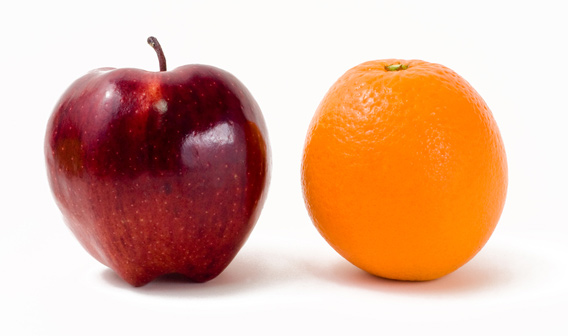

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Generate data

In [ ]:
# Make Apples (Fruit = 0)

n=100

weight  = 135. + 4.0*np.random.randn(n)
surface = 0.6 + 0.07*np.random.randn(n)
fruit   = np.zeros(n, dtype=int)
df1 = pd.DataFrame(np.column_stack((weight,surface,fruit)), columns=['Weight', 'Surface', 'Fruit'])

# Make Oranges (Fruit = 1)

weight  = 150 + 3.0*np.random.randn(n)
surface = 0.3 + 0.08*np.random.randn(n)
fruit   = np.ones(n, dtype=int)
df2 = pd.DataFrame(np.column_stack((weight,surface,fruit)), columns=['Weight', 'Surface', 'Fruit'])

Concatentate and write as CSV file.

In [ ]:
df = pd.concat([df1,df2])

df.Fruit = df.Fruit.astype(int)
df.to_csv('Fruit.csv', index=False, header=True)

df.head(5)

,Weight,Surface,Fruit
0,138.350939,0.532783,0
1,136.669134,0.611117,0
2,123.650433,0.576443,0
3,130.856992,0.629628,0
4,132.820943,0.526285,0


In [ ]:
df['Fruit'].value_counts()

0    100
1    100
Name: Fruit, dtype: int64

## Plot

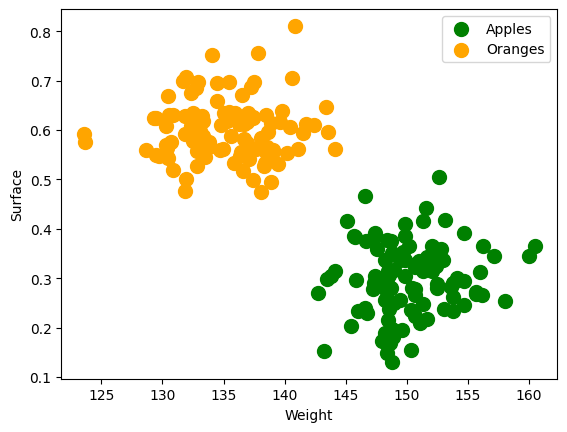

In [ ]:
# Code to plot the data set
plt.scatter(df['Weight'][df['Fruit']==1], df['Surface'][df['Fruit']==1], c='green',  label='Apples',  s=100)
plt.scatter(df['Weight'][df['Fruit']==0], df['Surface'][df['Fruit']==0], c='orange', label='Oranges', s=100)

plt.xlabel('Weight')
plt.ylabel('Surface')
plt.legend()
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib as mpl
mpl.rcParams['lines.markersize'] = 12

In [ ]:
# Reading the data
data = pd.read_csv('Fruit.csv')

# Showing the first 5 lines of data on the screen
data.head(5)

,Weight,Surface,Fruit
0,138.350939,0.532783,0
1,136.669134,0.611117,0
2,123.650433,0.576443,0
3,130.856992,0.629628,0
4,132.820943,0.526285,0


In [ ]:

# Preparing data and create training and test inputs and labels
inputs_train, inputs_test, labels_train, labels_test = model_selection.train_test_split(data[['Weight', 'Surface']].values, data['Fruit'].values, test_size=0.2)


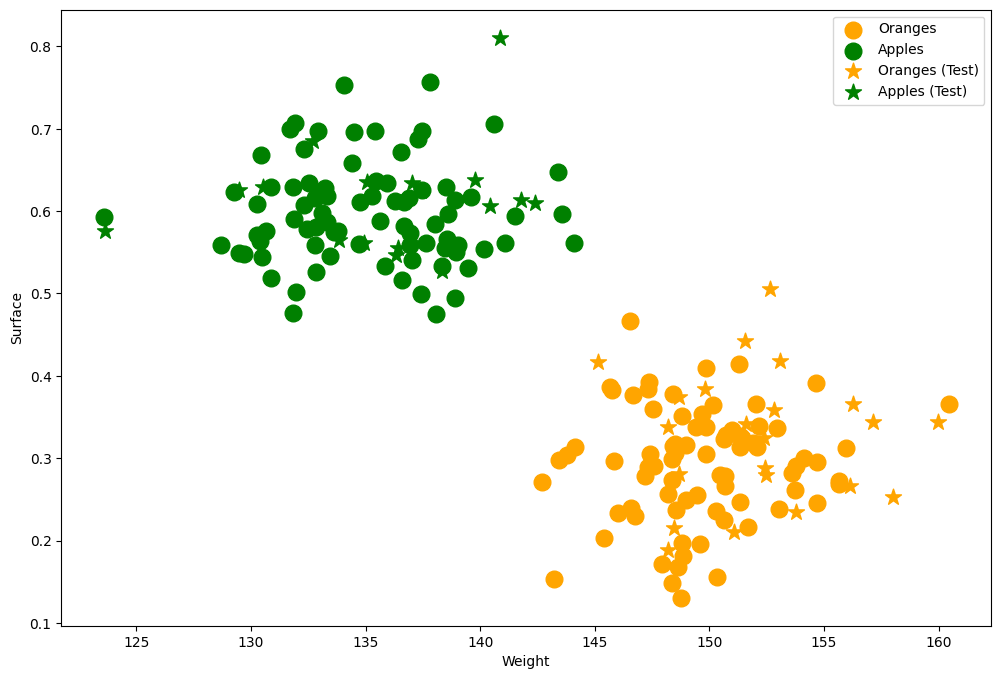

In [ ]:

# Plotting data
plt.figure(figsize=(12, 8))

plt.scatter(inputs_train[labels_train==1, 0], inputs_train[labels_train==1, 1], c='orange',  label='Oranges')
plt.scatter(inputs_train[labels_train==0, 0], inputs_train[labels_train==0, 1], c='green', label='Apples')
plt.scatter(inputs_test[labels_test==1, 0], inputs_test[labels_test==1, 1], c='orange',  label='Oranges (Test)',  marker='*')
plt.scatter(inputs_test[labels_test==0, 0], inputs_test[labels_test==0, 1], c='green', label='Apples (Test)', marker='*')

plt.xlabel('Weight')
plt.ylabel('Surface')
plt.legend()
plt.show()


In [ ]:

# Selecting the classifier we want to use
knn = KNeighborsClassifier()

# Learning based on inputs and labels from our dataset
knn.fit(inputs_train, labels_train)

KNeighborsClassifier()

In [ ]:

# Predict what the classes are based on the testing data
predictions = knn.predict(inputs_test)

# Print the score on the testing data
print("KNN Testing Set Score:")
print(accuracy_score(labels_test, predictions)*100)


KNN Testing Set Score:
97.5


In [ ]:

# Specify weight and surface value for unknown fruit
weight = 160
surface = 0.3

# Use the computer to predict which kind of fruit this might be and print it
print (knn.predict([[weight, surface]]))


[1]
